In [2]:
import os
import gudhi
import json
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
basic_path=os.path.join(os.getcwd(),'result','complex')
_complex='alpha'
work_path=os.path.join(basic_path,_complex)
file_list=os.listdir(work_path)
file_name=file_list[0]

In [29]:
def get_persistence_diagram(file_name):
    with open(file_name,'r') as f:
        data=json.load(f)
    diagram_dict={'good':[],'bad':[]}
    for key in data.keys():
        print(key)
        for dt in data[key]:
            diagram_dict[key]+=dt
    return diagram_dict

In [45]:
def save_diagram(diagram_dict,save_path):
    fig=plt.figure(figsize=(60,10))
    gs=gridspec.GridSpec(nrows=1,ncols=2)
    t0=fig.add_subplot(gs[0,0])
    tmp=gudhi.plot_persistence_diagram(diagram_dict['good'],axes=t0)
    t1=fig.add_subplot(gs[0,1])
    tmp2=gudhi.plot_persistence_diagram(diagram_dict['bad'],axes=t1)
    plt.savefig(save_path)
    plt.show()


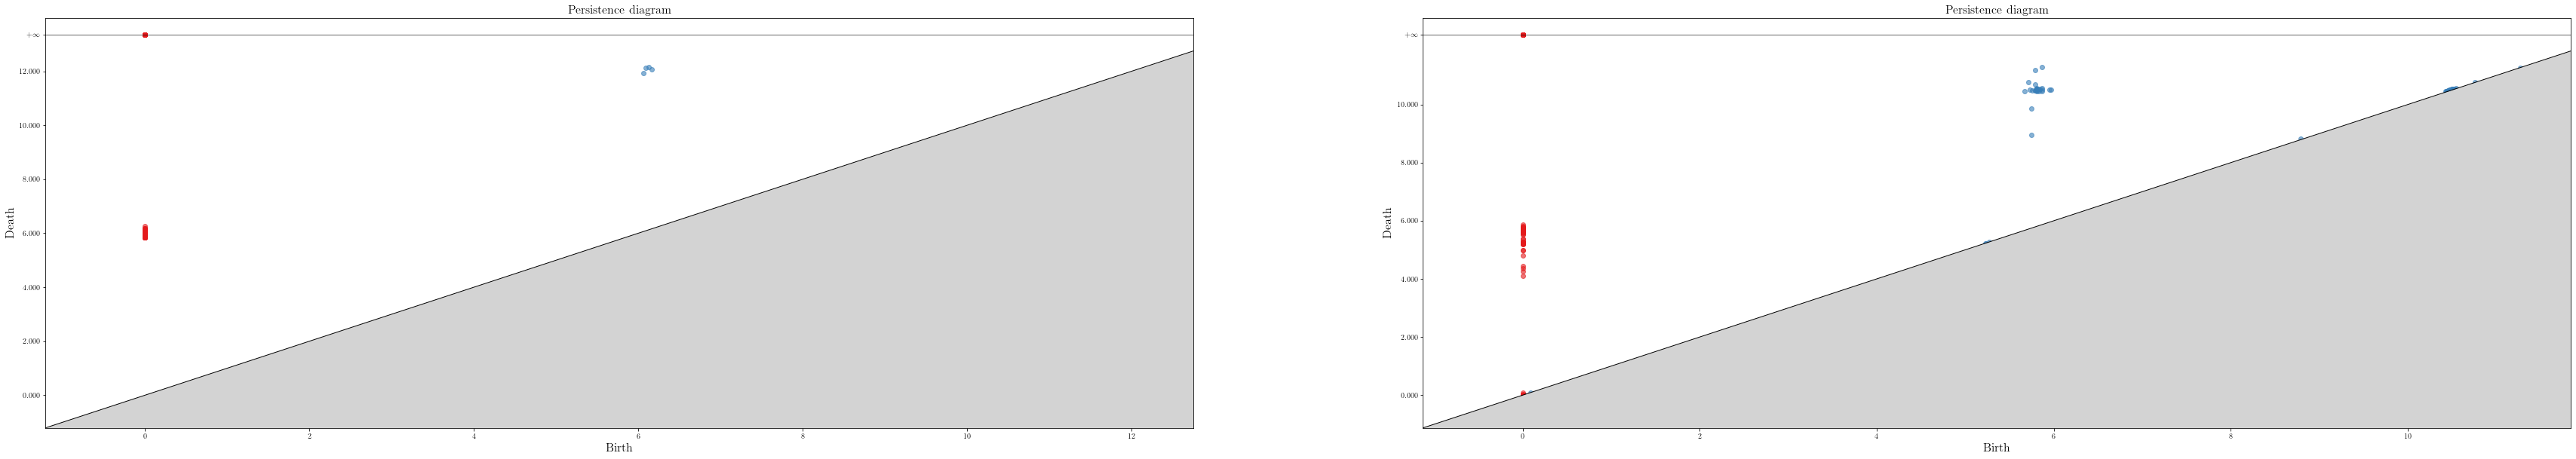

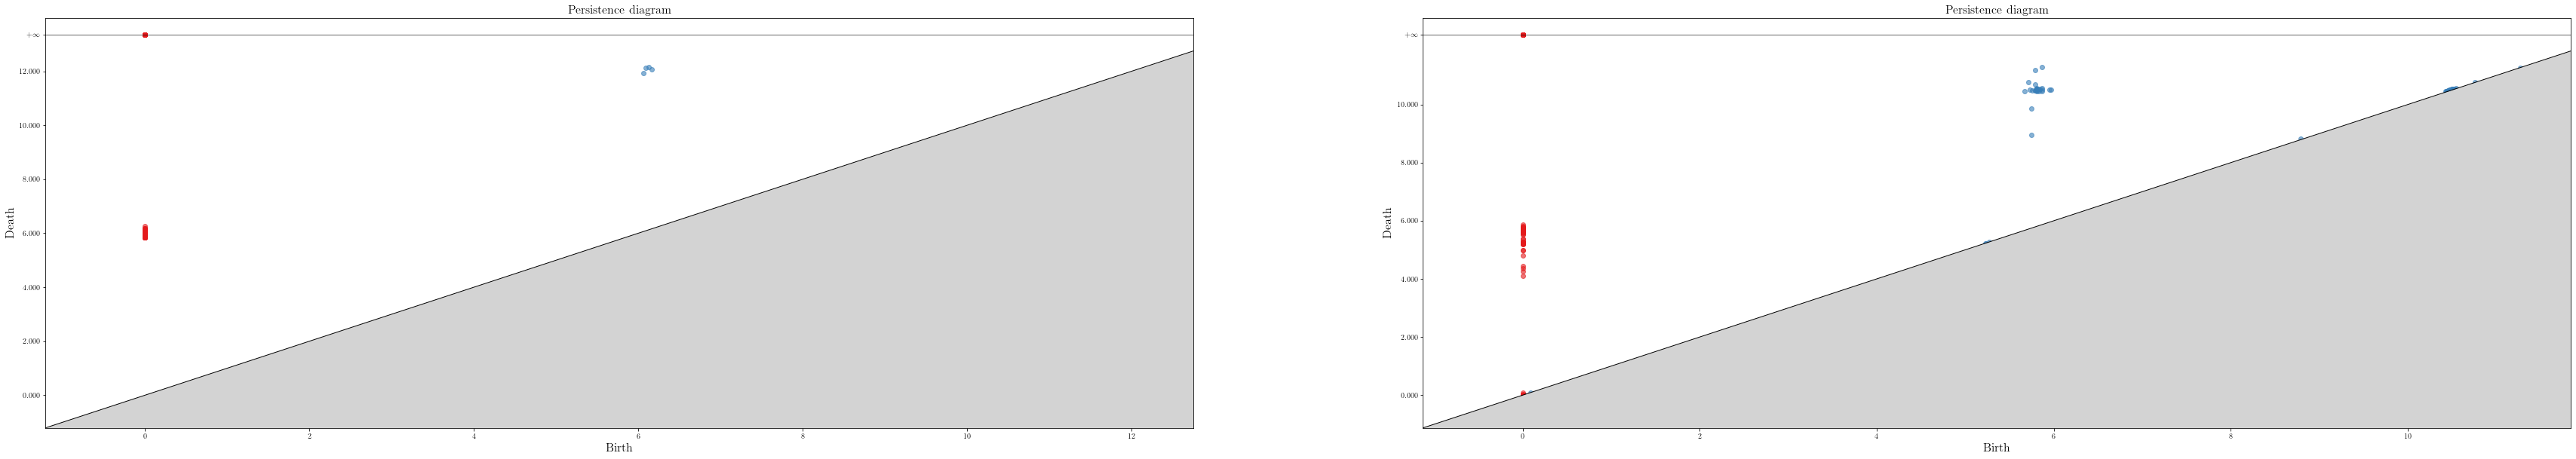

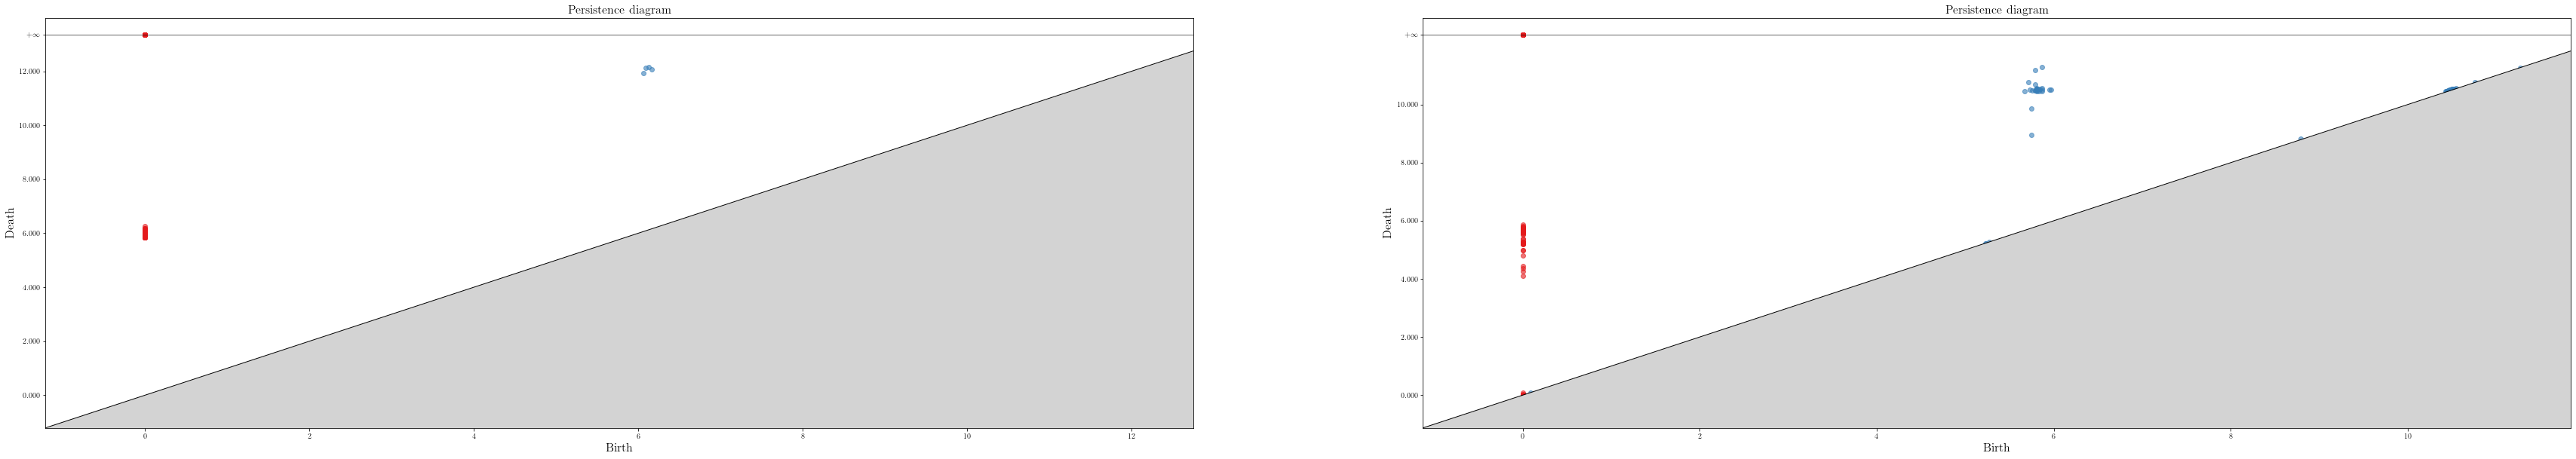

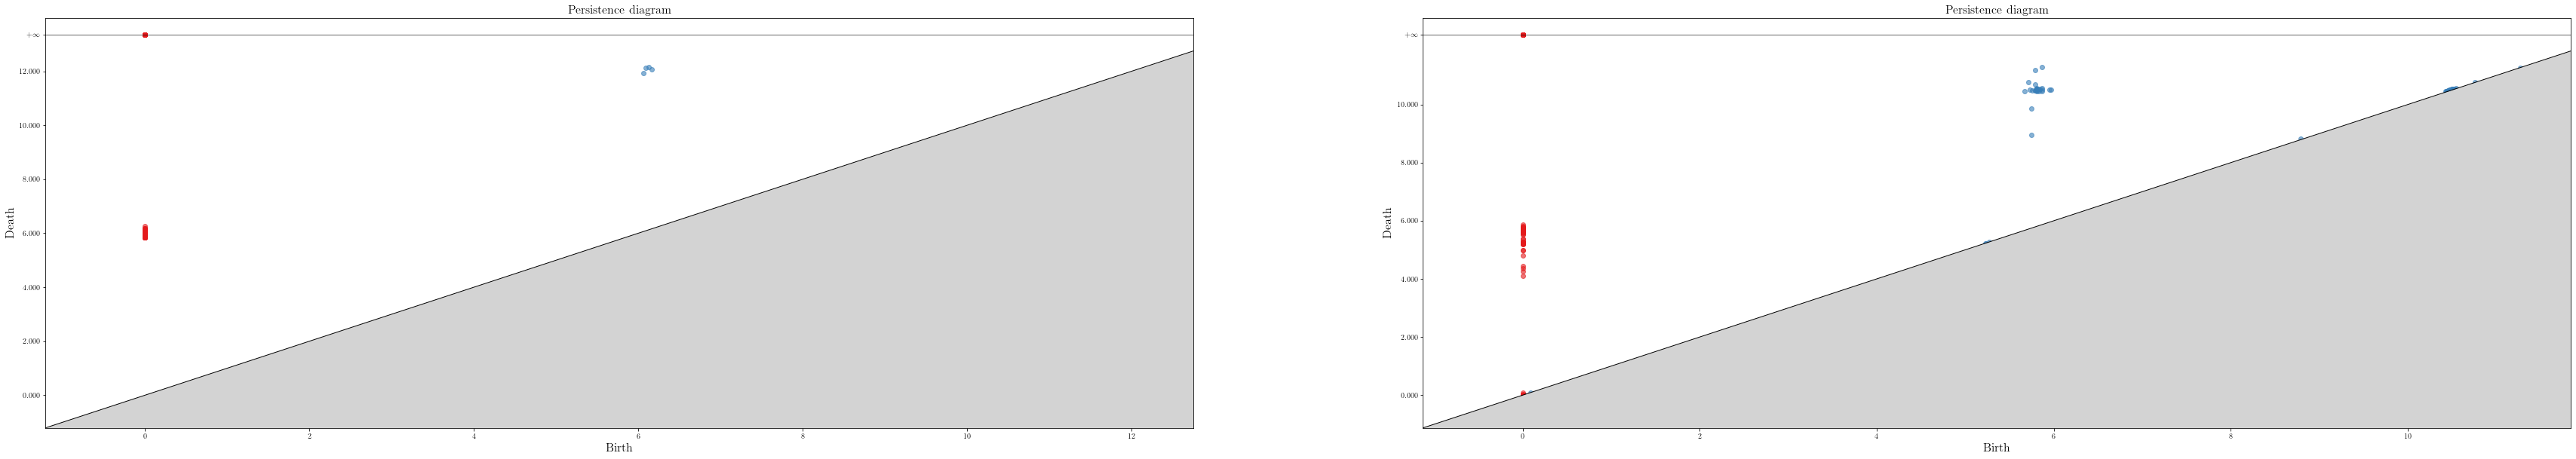

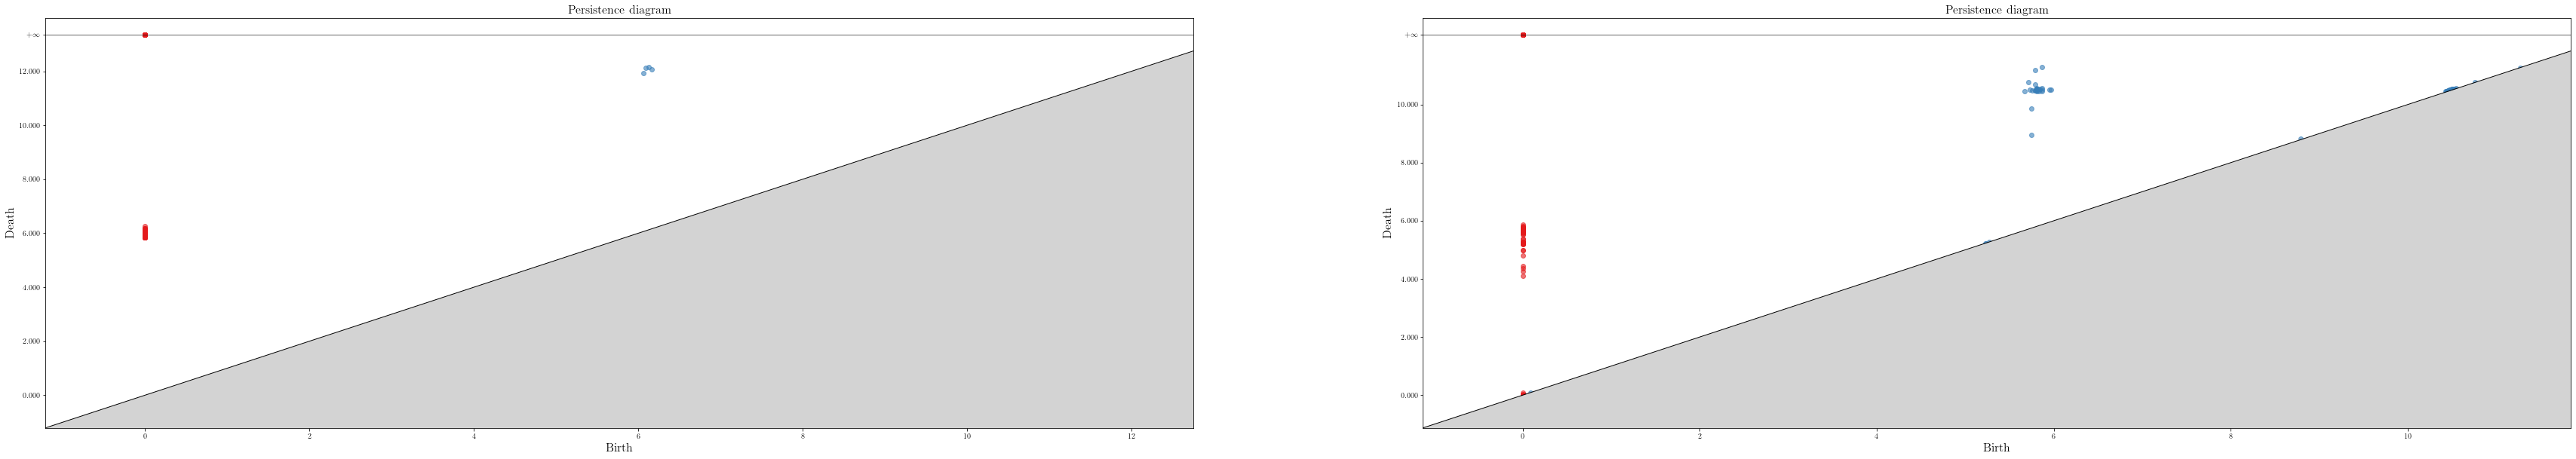

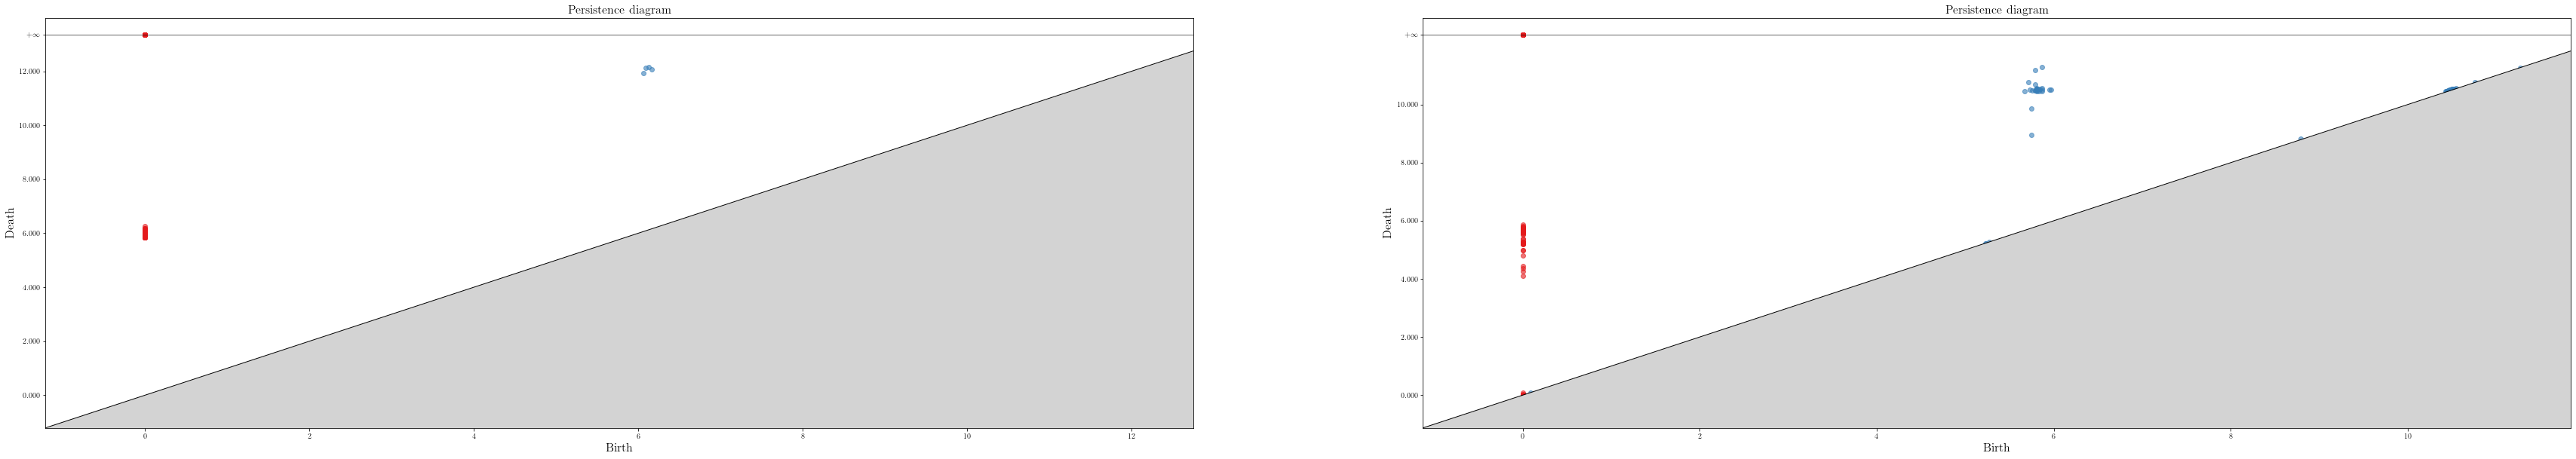

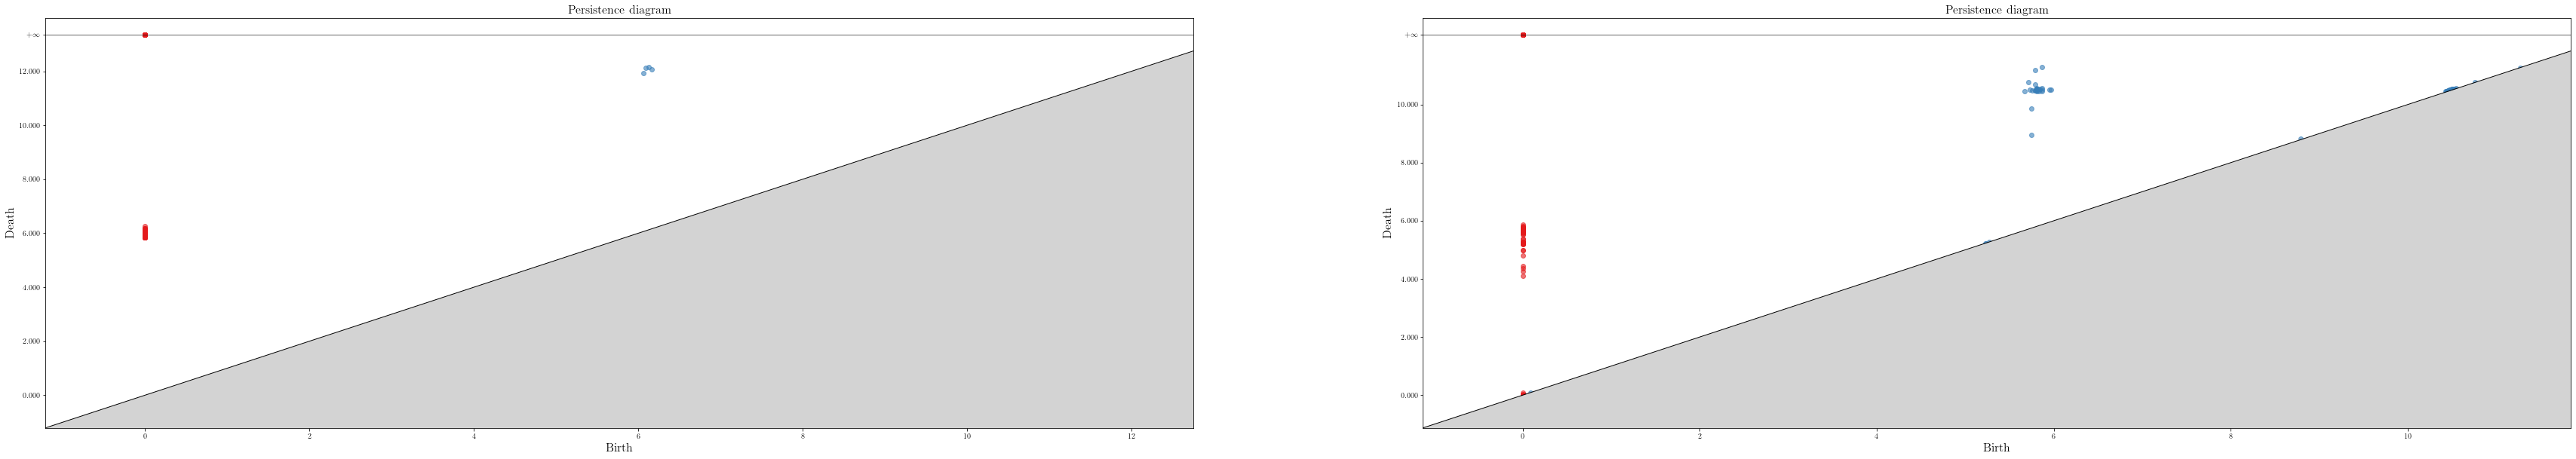

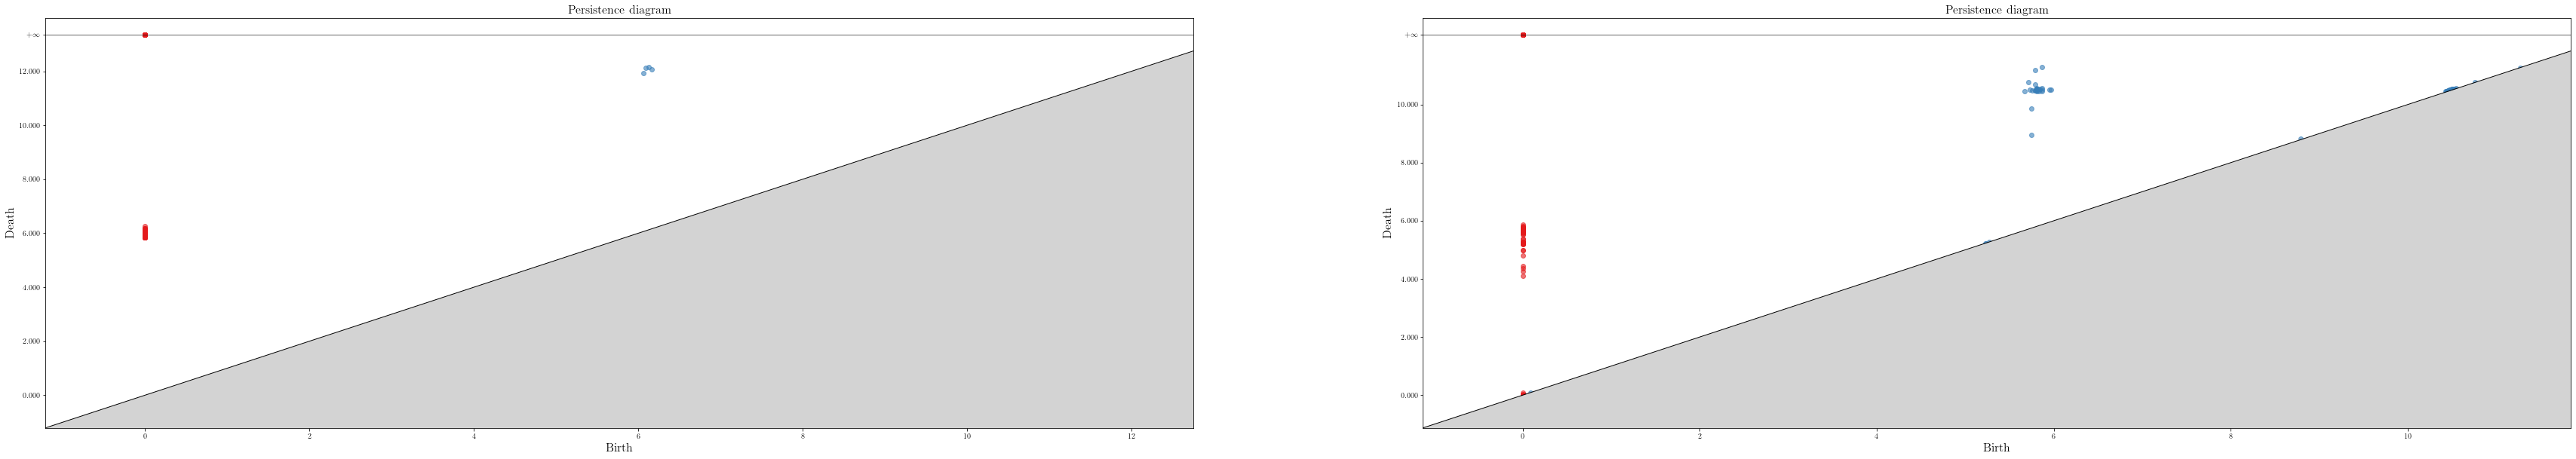

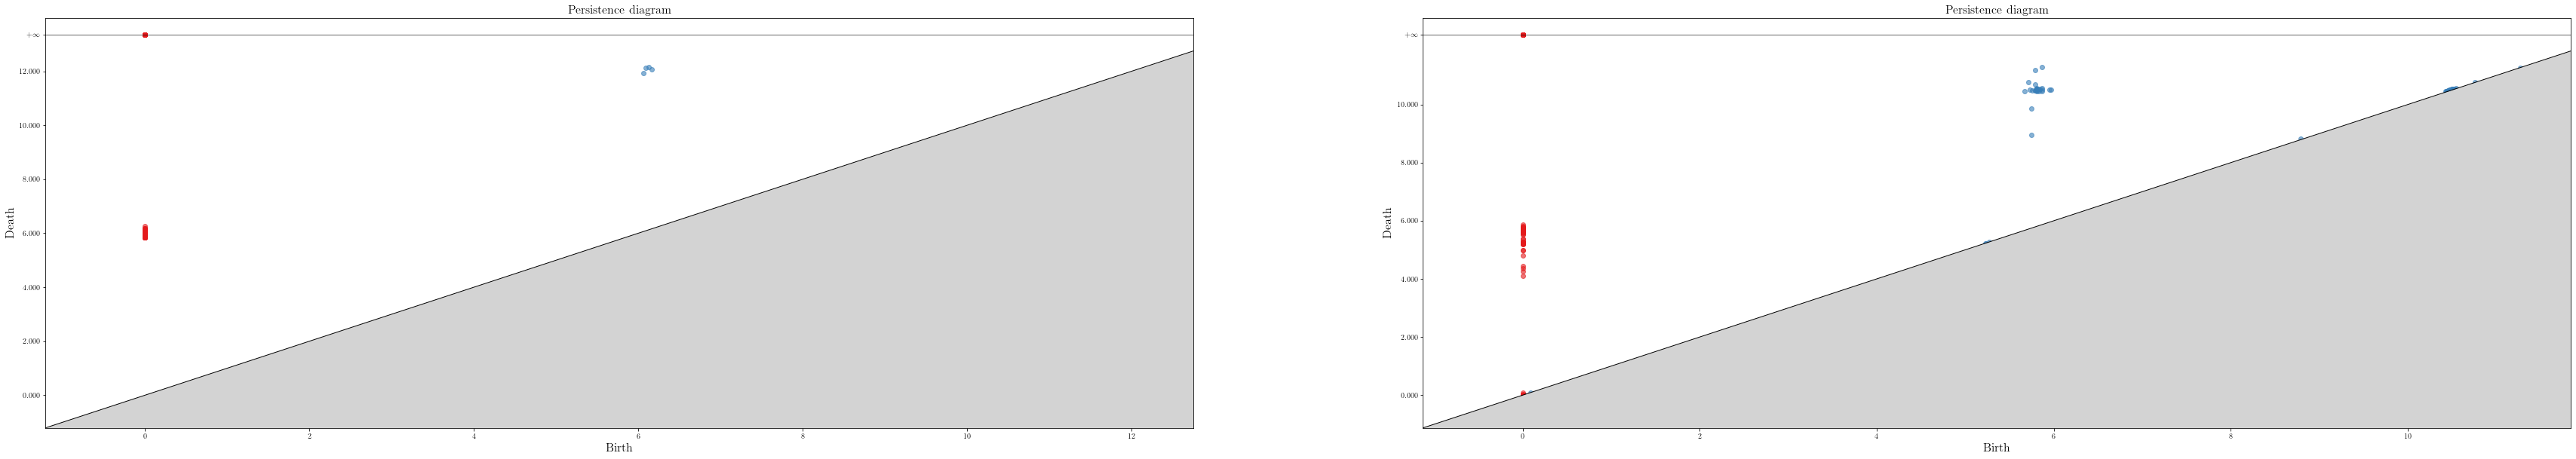

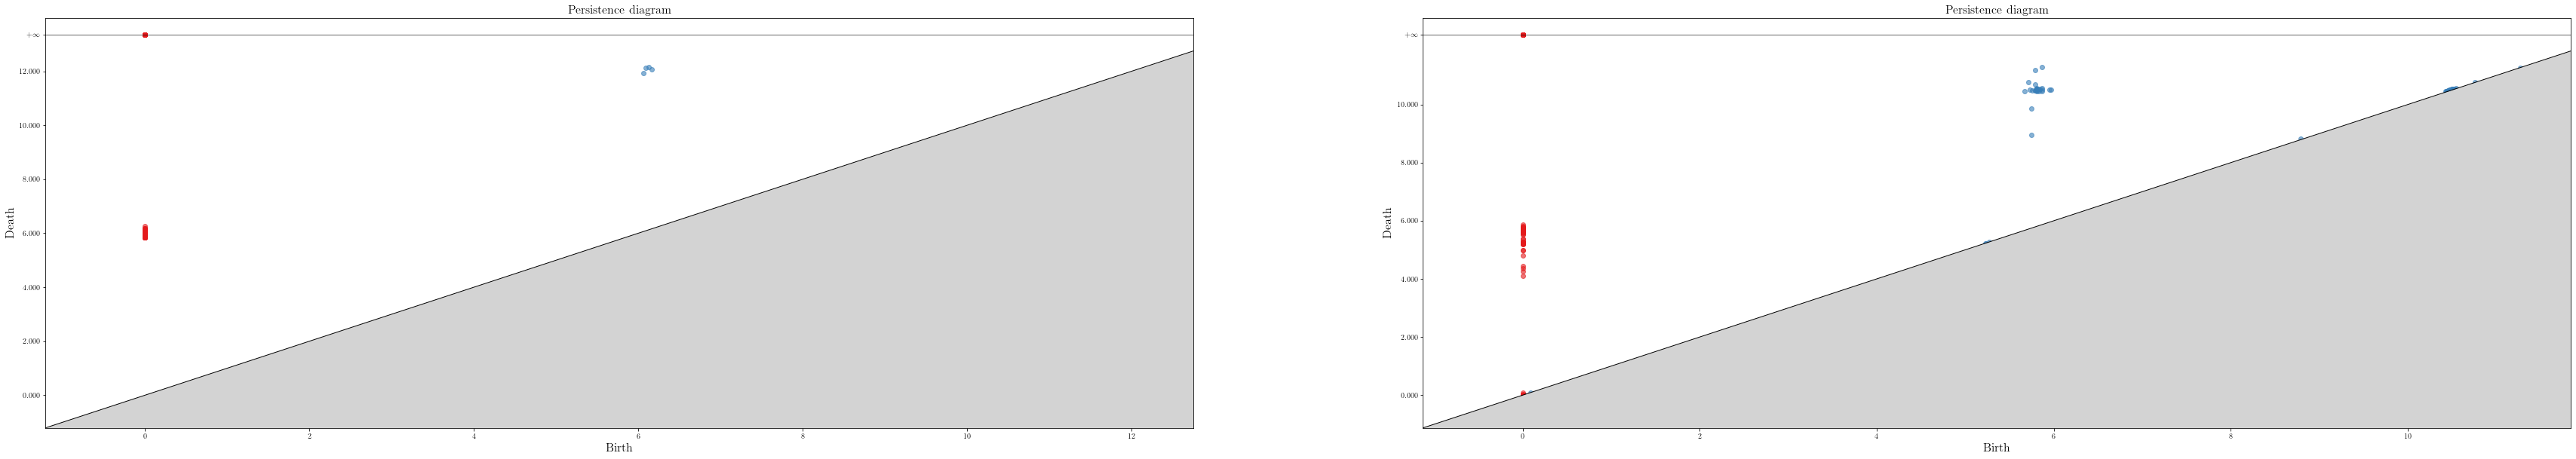

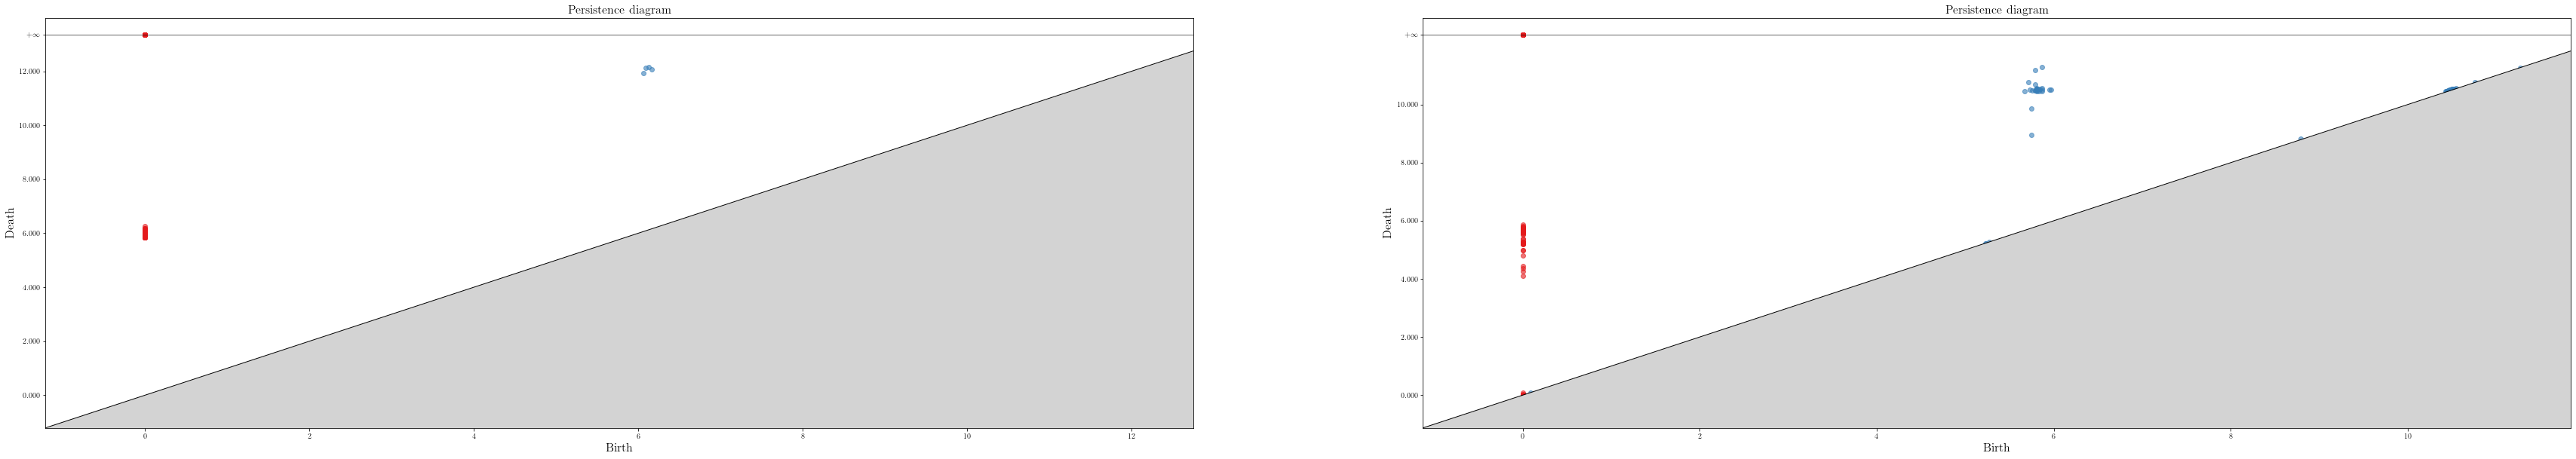

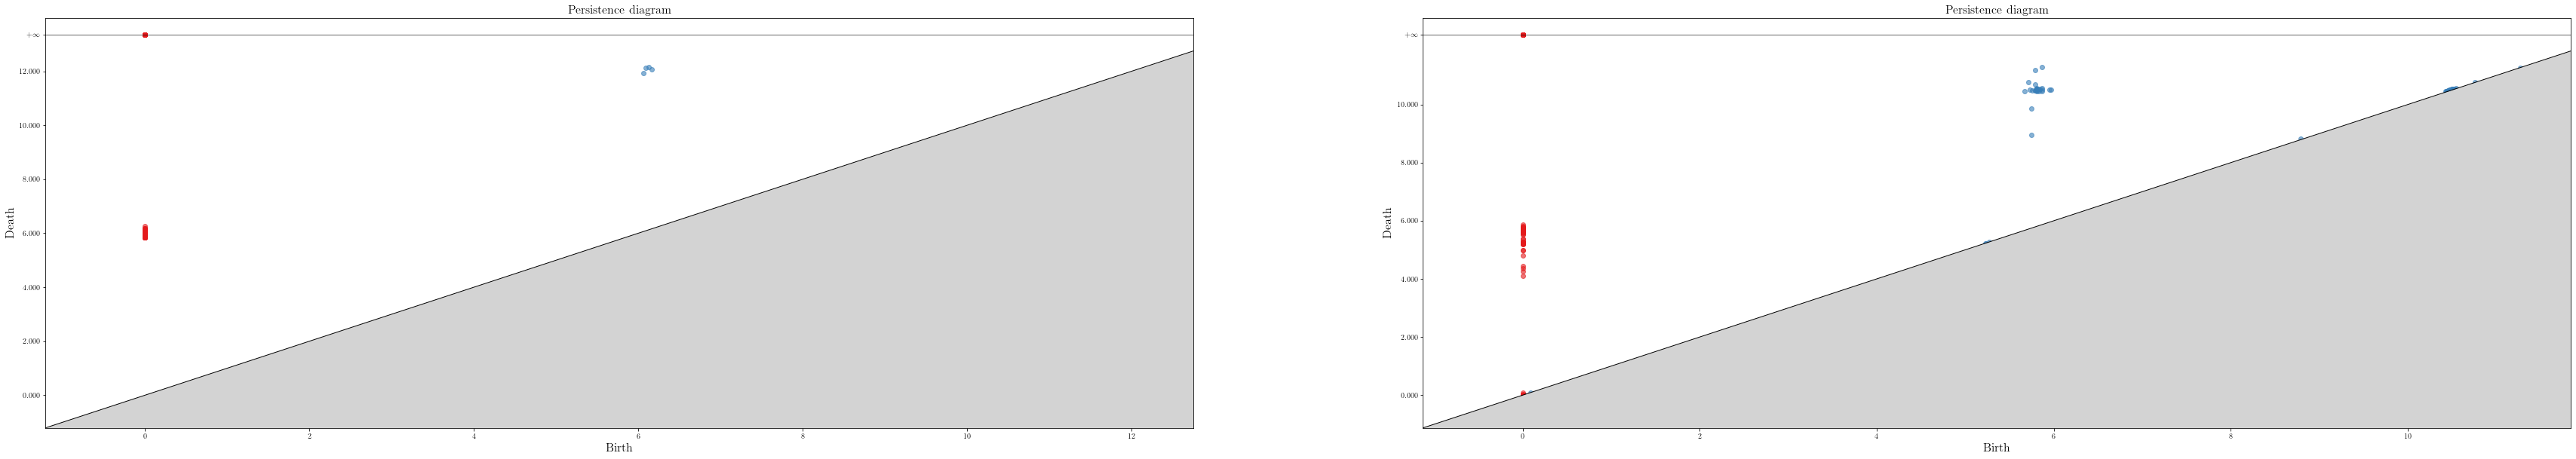

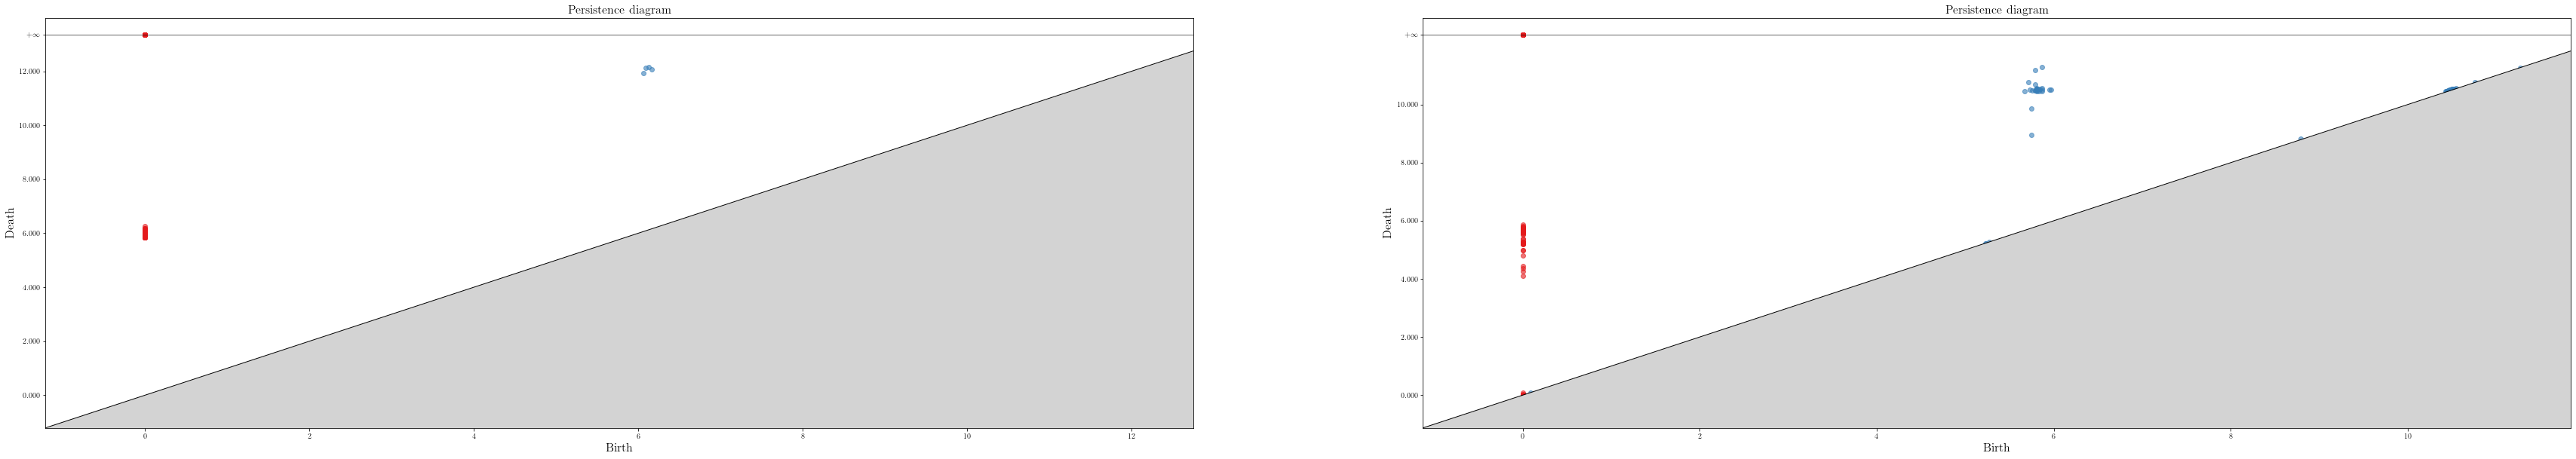

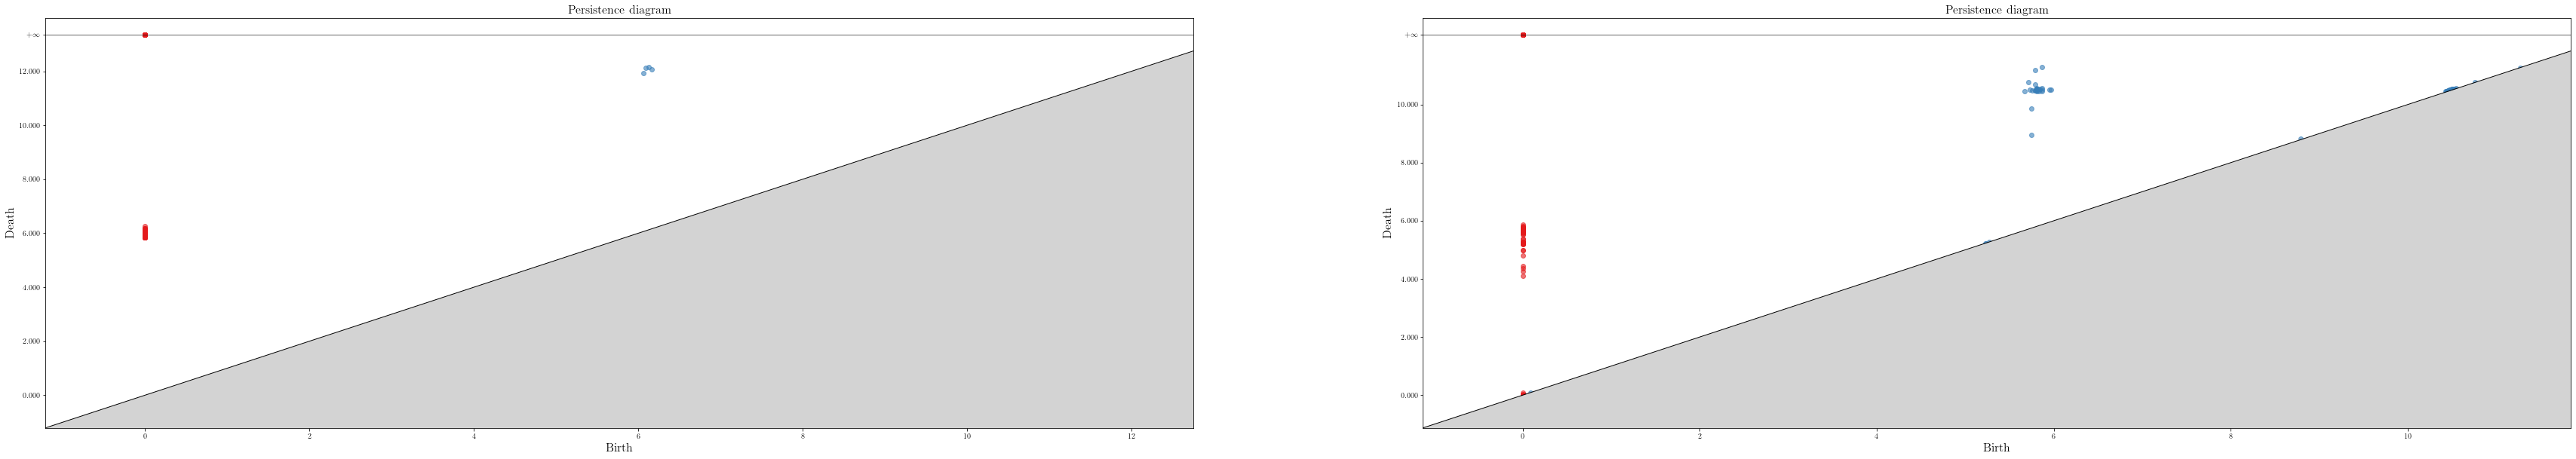

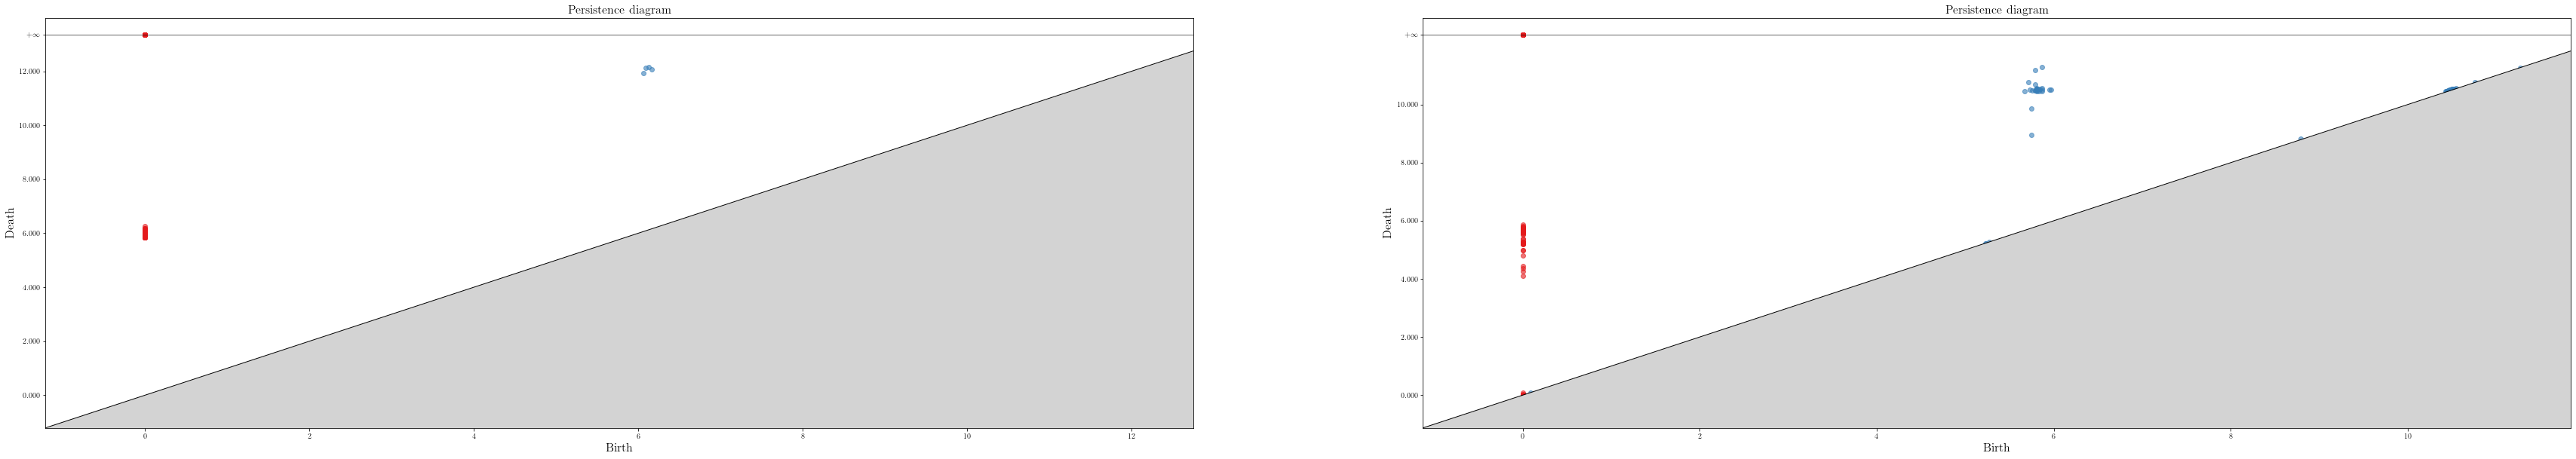

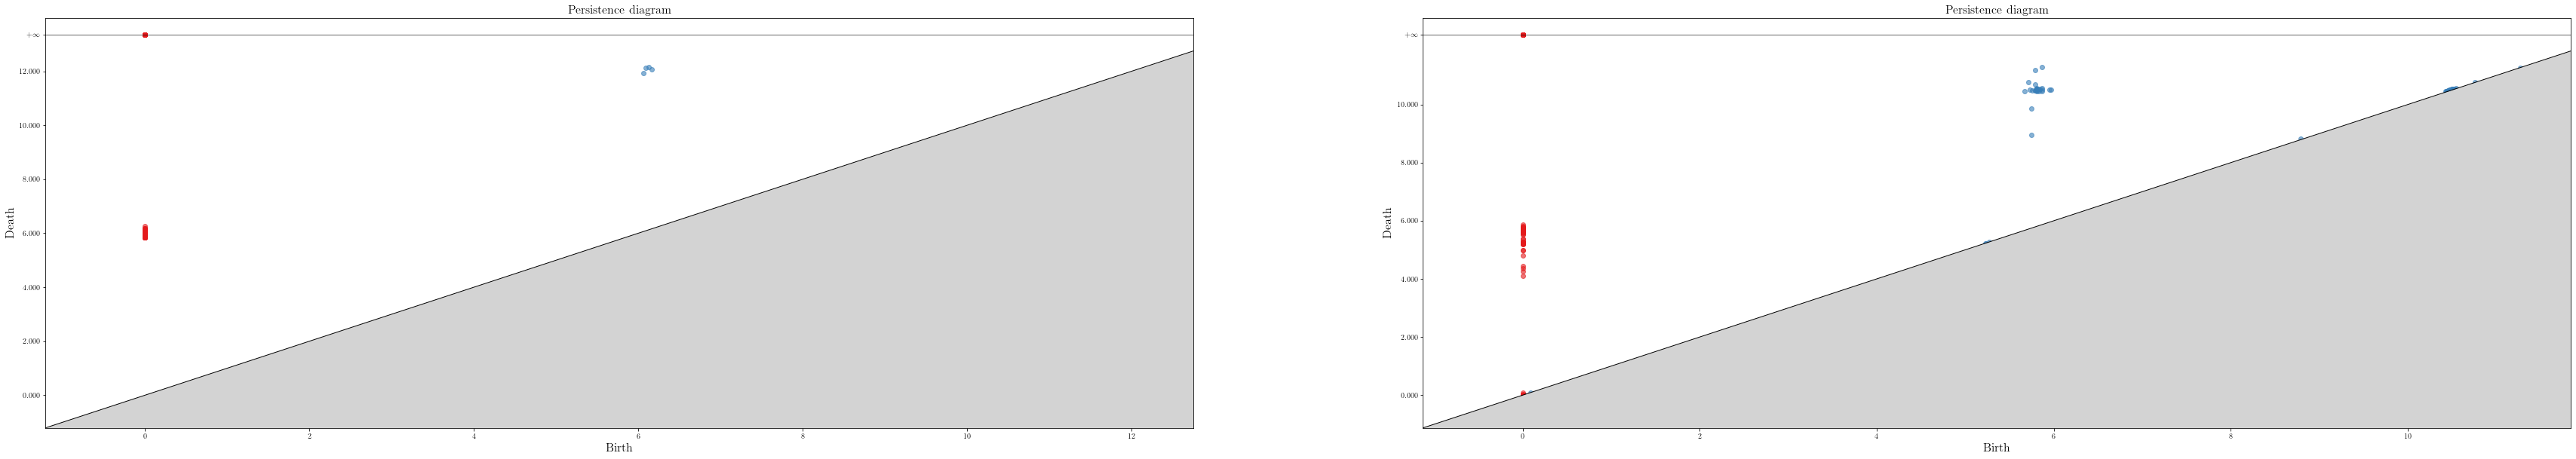

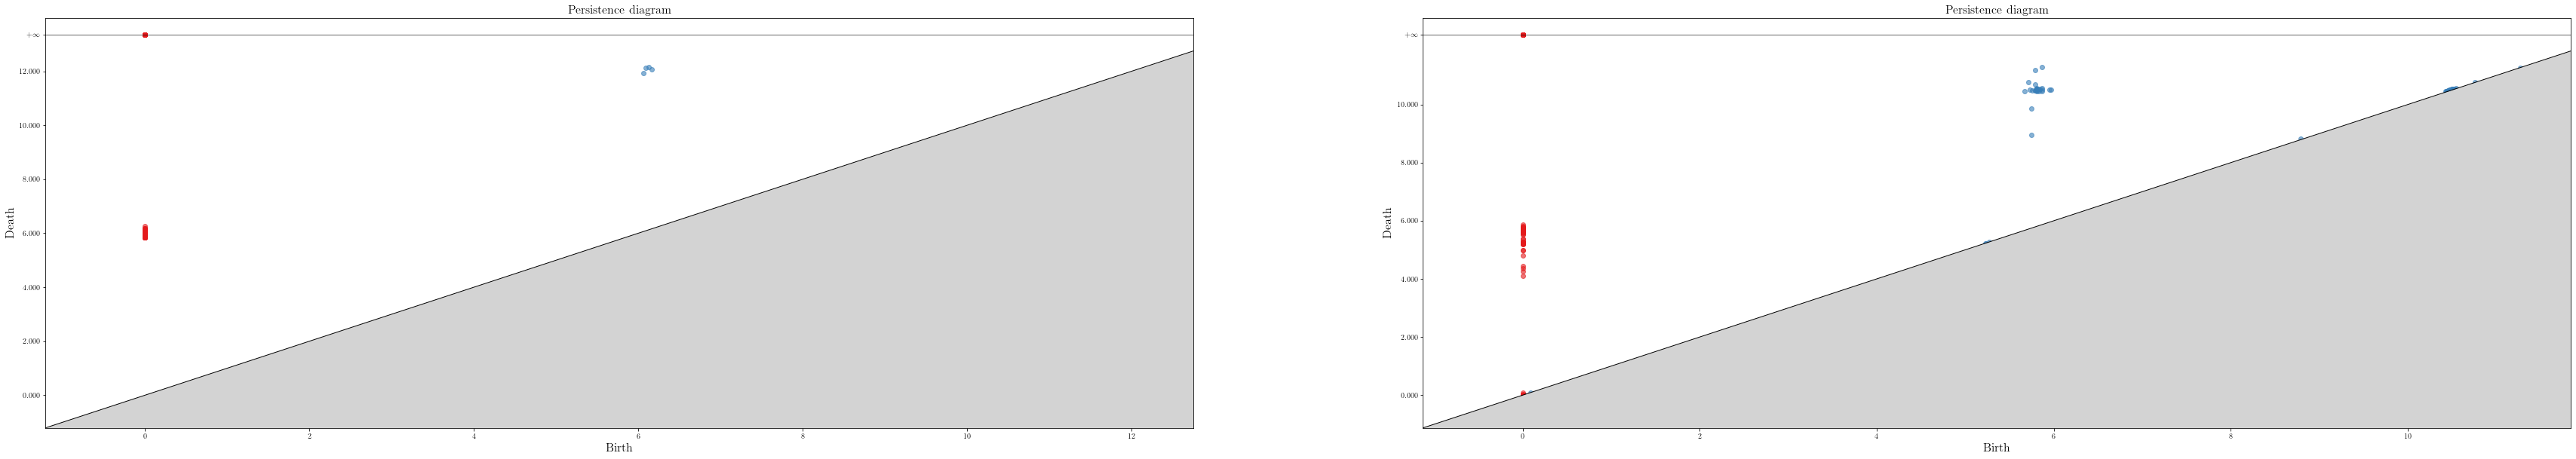

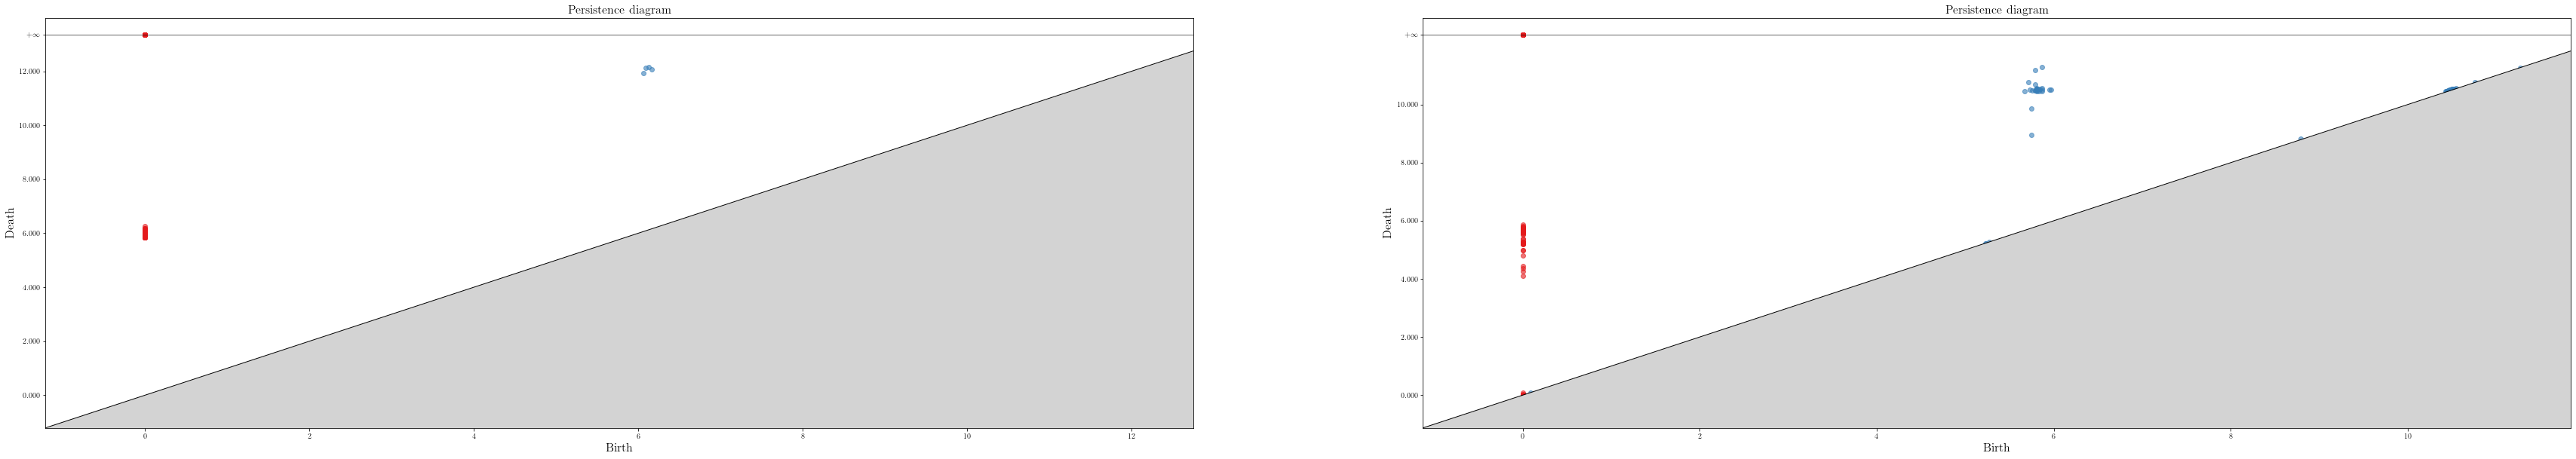

In [48]:
######3
save_basic_path=os.path.join(os.getcwd(),'result','graph','complex')
dict_key=['alpha','rips']
for _complex in dict_key:
    work_path=os.path.join(basic_path,_complex)
    file_list=os.listdir(work_path)    
    for file_name in file_list:
        name,_=os.path.splitext(file_name)
        complex_,num=name.split('_')
        complex_path=os.path.join(save_basic_path,complex_)
        if not os.path.isdir(complex_path):
            os.mkdir(complex_path)
        save_name=os.path.join(complex_path,name)+'.png'
        save_diagram(diagram_dic,save_name)

In [ ]:
###############################################

In [11]:
def split_xy(data_dict):
    result_dict={'good':[[],[]],'bad':[[],[]]}
    for key in data_dict.keys():
        for data in data_dict[key]:
            #print(data)
            x=[]
            y=[]
            print(data)
            for x_,y_ in data:
                x.append(x_)
                y.append(y_)
            result_dict[key][0].append(x)
            result_dict[key][1].append(y)
    return result_dict

In [9]:
def save_embedding_result(good_te,save_name=False):
    index=0
    key_dict={}
    fig=plt.figure(figsize=(25,7))
    gs=gridspec.GridSpec(nrows=1,ncols=2)
    for key in good_te.keys():
        if key not in key_dict.keys():
            key_dict[key]=fig.add_subplot(gs[0,index])
            index+=1
        ax=key_dict[key]
        data_x=good_te[key][0]
        data_y=good_te[key][1]

        ax.plot(data_x,data_y)
        #ax.grid(True)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title(key)
    if save_name:
        plt.savefig(save_name)

In [13]:
embedding_basic_path=os.path.join(os.getcwd(),'result','embedding')
file_list=os.listdir(embedding_basic_path)
embedding_save_path=os.path.join(os.getcwd(),'result','graph','embedding')
for file_name in file_list:
    if file_name.split('.')[0]!=2:
        continue
    with open(os.path.join(embedding_basic_path,file_name),'r') as f:
        data=json.load(f)
    result_dict=split_xy(data)
    name,_=os.path.splitext(file_name)
    save_name=os.path.join(embedding_save_path,name)+'.png'
    save_embedding_result(data,save_name)
    


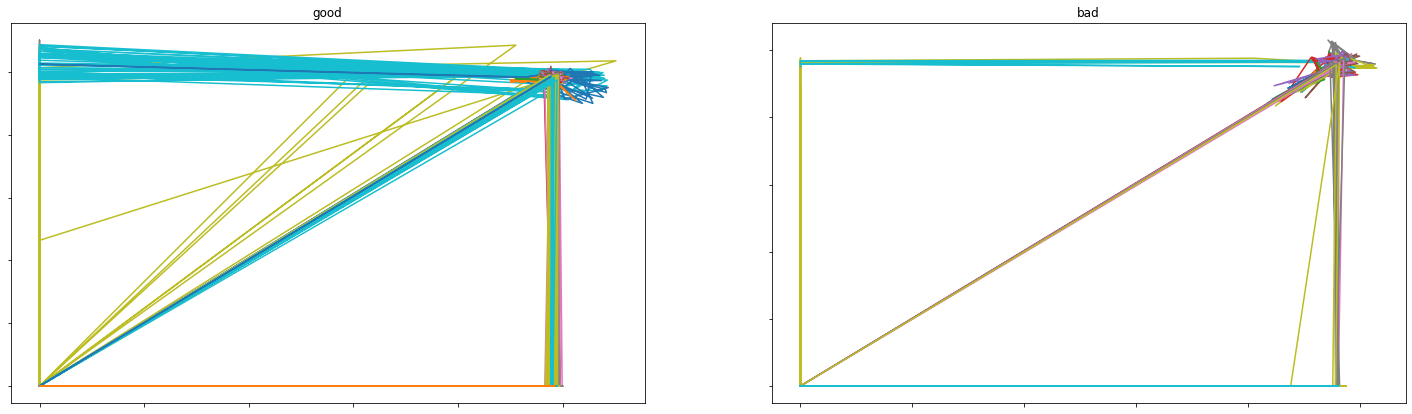

In [8]:
save_total_te_result(result_dict)